# ANOVA (Analysis of Variance) on the result of a TOXCAT experiment

The Analysis of Variance (ANOVA) test is a statistical test that can be done to tell if a variation between several groups is "significant". Usually it is conducted instead of multiple T-tests when comparing the means of more than two groups at a time. Because with each T-test, the likelihood of drawing an incorrect conclusion increases. For more information see [here](https://www.biologyforlife.com/anova.html).

The ANOVA test is often used in biology after diverse experiments. In this notebook, we will perform an ANOVA on the result of a TOXCAT experiment. TOXCAT is a widely used genetic assay to study interactions of transmembrane helices within the inner membrane of the bacterium *Escherichia coli*. In this example we will used the result of the TOXCAT assay on the transmembrane helices of a *E. coli* type VI secretion system (T6SS) protein named TssL.
The data that I used in this notebook come from my Master thesis project, which was done under the supervision of Jean-Pierre Duneau and Eric Durand at the ["Laboratoire d'Ingénierie des Systèmes Macromoléculaires"](https://lism.cnrs-mrs.fr) (UMR7255) CNRS, Marseille. 

To run the notebook, you need to install [Anaconda](https://www.anaconda.com/download/), clone this directory, install and run the environment in the right directory with these commands in a terminal:

* `conda env create -f environment.yml`

* `activate Toxcat_environment`

If you have any question, you can contact me with the email address: camille.garcia@biochemistry.lu.se. 


## I- Type VI secretion system (T6SS)

Micro-organisms proteins secretion is a key step in the colonization of new niches [(Hibbing M. *et al.*)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2879262/). It requires the use of nano-machines, such as the type VI secretion system (T6SS), which is involved in the virulence of many pathogens [(Costa T. *et al.*)](https://www.ncbi.nlm.nih.gov/pubmed/25978706).

<img src="./pictures/T6SS_fonction.PNG" width="900"/>

> General information of the  T6SS. Schematic representation of **A) global architecture of the T6SS**, with a photo of electronic cryotomography (9.5 nm scale black band) and **B) T6SS mechanism.**

The T6SS is composed of thirteen core proteins that form three different sub-complexes named : contractile tail, assembly platform and membrane complex [(Chen L. *et al.*)](https://www.ncbi.nlm.nih.gov/pubmed/25721475). After each "firing" of the machinery, the membrane complex formed of TssJ, TssL and TssM is reused unlike the other sub-complexes, which makes it a potentially therapeutic target [(Zoued A. *et al.*, 2014)](https://www.ncbi.nlm.nih.gov/pubmed/24681160).

<img src="./pictures/ComplexeMb.PNG" width="900"/>

> **A) Schematic representation of the membrane complex of T6SS**. This complex is composed of three proteins TssJ (yellow), TssM (blue) and TssL (red). The resolved structures of the different domains of the complex are represented. 
**B) Representation of the monomers composing the T6SS**. TssJ (yellow) is a lipoprotein anchored to the outer membrane (OM), TssM (blue) is anchored to the inner membrane (IM) by three transmembrane segments (M1, M2 and M3) and TssL (red) anchored to the IM by its transmembrane segment (L).

In this project, we focused on the homodimerization of the transmembrane helix of *E. coli* T6SS TssL protein. To better characterize this interaction, we want to use interfering peptides that will prevent the assembly of the membrane complexe. To find a peptide that will interfer with TssL transmembrane dimerisation we used a technique called TOXCAT.


## II- TOXCAT

TOXCAT experiment is based on the activity of the Chloramphenicol Acyl Transferase (CAT) [(Russ W. *et al.*)](https://www.ncbi.nlm.nih.gov/pubmed/9927659). This enzyme is active only if the N-terminal domain of the ToxR protein, a transcription activator, is dimerized. This dimerization trigger the *ctx* gene transcription, which code for CAT. A fusion of the ToxR protein with the L peptide has been created, it will allow us to report the ability of our peptides to interfere with the homo-L interaction. If these peptide interfere with L homo-dimerisation, then the CAT activity will decrease.

<img src="./pictures/Explication.PNG" width="900"/>

> TOXCAT experiment principle : **A) Without interfering peptide**. Dimerization of L allows the activity of ToxR by the production of Chloramphenicol Acyl Transferase (CAT). **B) In presence of interfering peptide**. Dimerization of L is compromised. In this case, there is little or no transcription of the cat gene (*ctx*).

### 1- Mesurement of CAT activity

The dimerization of L leads to the production of CAT which will help to convert chloramphenicol to a molecule called 5-thio-2-nitro-benzoic acid (TBN), which absorbs light at a wavelenght of 412 nm. Thus, one can obtain the activity of the CAT according to the production of TBN. The concentration of TBN can be calculate thanks to Beer Lambert law:

$$
[TBN] =  \frac{A}{\epsilon \cdot l}
$$

With the molar absorption coefficient ( **$\epsilon$** ) equal to 13,600 L.mol$^{-1}$.cm$^{-1}$, the cuvette width ( **$l$** ) equal to 1.2 cm, the absorbance ( **$A$** ).

### 2- Peptide tested

In this study, we will test the interefering capacity of two peptides, the transmembrane helix of TssL (named L) and a variant of L with four lysines residus framing the transmembrane part of the helix (named K). These lysine mutation are based on a peptide used in a previous study [(Zoued A. *et al.*, 2018)](https://www.ncbi.nlm.nih.gov/pubmed/29458124).

| Peptide       |Sequence                                | 
|:--------------|:-------------------------------------- | 
| L             | AGRT**MYWLSWGAGIVTLAGLWCVLSSVLA**DQVAR |
| K             | AGKK**MYWLSWGAGIVTLAGLWCVLSSVLA**KKVAR |

>Table showing the peptide used. The bold sequence corresponds to the transmembrane part of the peptide.

Thus, we will have four samples in total :
* **Null** - *E. coli* cells with empty plasmid (negative control).
* **Tox** - Bacteria that have the TOXCAT construction (positive control).
* **L+tox** -  Cells that contain a TOXCAT construction and L peptide.
* **K+tox** -  *E. coli* cells with TOXCAT construction and K peptide.

## III- Analysis

The absorbance of each sample was measured in biological triplicate (noted from 1.x to 3.x) and technical triplicate (noted from x.1 to x.3).

In addition to the CAT activity quantification, a measurement before chloramphenicol supplementation was taken for each sample. This quantification corresponds to the bacterial fluorescence background. 

### 1- CAT activity calculation from raw data

#### a) Background fluorescence

The quantification of the background fluorescence of the cells is taken on a shorter time than the actual mesurement. We thus need to calculate the mean background that we will remove from the actual CAT-fluorescence. The background mesurement is stored in the file : `basal.csv`.

In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab 
import scipy.stats as stats

In [2]:
background = pd.read_csv("activity/basal.csv", names=["Time (s)","Null_1.1","Null_1.2","Null_1.3","Null_2.1","Null_2.2","Null_2.3","Null_3.1","Null_3.2","Null_3.3", "Tox_1.1", "Tox_1.2", "Tox_1.3", "Tox_2.1", "Tox_2.2", "Tox_2.3", "Tox_3.1", "Tox_3.2", "Tox_3.3", "L+tox_1.1", "L+tox_1.2", "L+tox_1.3", "L+tox_2.1", "L+tox_2.2", "L+tox_2.3", "L+tox_3.1", "L+tox_3.2", "L+tox_3.3", "K+tox_1.1","K+tox_1.2","K+tox_1.3", "K+tox_2.1","K+tox_2.2","K+tox_2.3", "K+tox_3.1","K+tox_3.2","K+tox_3.3"])
temp_background = pd.concat([background])  
 
background_table = temp_background[1:].astype('float64')

#print the table
background_table.style

,Time (s),Null_1.1,Null_1.2,Null_1.3,Null_2.1,Null_2.2,Null_2.3,Null_3.1,Null_3.2,Null_3.3,Tox_1.1,Tox_1.2,Tox_1.3,Tox_2.1,Tox_2.2,Tox_2.3,Tox_3.1,Tox_3.2,Tox_3.3,L+tox_1.1,L+tox_1.2,L+tox_1.3,L+tox_2.1,L+tox_2.2,L+tox_2.3,L+tox_3.1,L+tox_3.2,L+tox_3.3,K+tox_1.1,K+tox_1.2,K+tox_1.3,K+tox_2.1,K+tox_2.2,K+tox_2.3,K+tox_3.1,K+tox_3.2,K+tox_3.3
1,0,0.0964,0.101,0.1053,0.1016,0.1053,0.105,0.1061,0.106,0.1036,0.0879,0.0904,0.0908,0.1104,0.1205,0.1167,0.1211,0.1145,0.1075,0.0982,0.1089,0.0993,0.108,0.1043,0.1173,0.1044,0.101,0.1134,0.1019,0.1018,0.1043,0.1111,0.1134,0.1097,0.103,0.0998,0.0999
2,27.6,0.1026,0.1077,0.1081,0.1005,0.1059,0.1046,0.1059,0.1084,0.1078,0.0909,0.0953,0.0954,0.112,0.1151,0.1118,0.1212,0.125,0.1194,0.1024,0.1138,0.1015,0.1087,0.1024,0.1139,0.1087,0.1045,0.112,0.1042,0.1082,0.1052,0.111,0.1124,0.1091,0.1019,0.0986,0.0978
3,55.2,0.109,0.1143,0.1137,0.1035,0.1071,0.1054,0.1099,0.1084,0.1087,0.0941,0.0962,0.0972,0.1141,0.1142,0.1167,0.1255,0.1232,0.1247,0.108,0.1128,0.1091,0.1107,0.107,0.1148,0.1114,0.1065,0.1105,0.1066,0.1122,0.1078,0.113,0.1112,0.1113,0.1036,0.1016,0.1012
4,82.7,0.1123,0.1131,0.1153,0.1035,0.1076,0.1032,0.1072,0.1054,0.1063,0.0968,0.0961,0.0954,0.1127,0.1136,0.1134,0.1248,0.1221,0.1294,0.1119,0.1134,0.1128,0.1128,0.1078,0.1163,0.1134,0.1073,0.1126,0.1098,0.1128,0.1095,0.1142,0.1131,0.113,0.1049,0.1019,0.102
5,110.3,0.1141,0.115,0.1145,0.1038,0.1075,0.1036,0.1097,0.1081,0.11,0.098,0.0961,0.0962,0.1132,0.1161,0.1162,0.1292,0.1228,0.1284,0.1125,0.1141,0.113,0.1144,0.1092,0.1171,0.1163,0.1089,0.114,0.1119,0.1136,0.1117,0.1149,0.1145,0.1128,0.107,0.1038,0.1038
6,137.9,0.1155,0.1147,0.1163,0.1051,0.1078,0.1053,0.1111,0.1086,0.1103,0.0972,0.0974,0.0989,0.1128,0.1152,0.117,0.1298,0.1236,0.1278,0.114,0.1168,0.1161,0.1155,0.11,0.1178,0.1173,0.1088,0.1139,0.1125,0.1136,0.1132,0.1152,0.1155,0.1125,0.106,0.1032,0.1027
7,165.5,0.1163,0.1143,0.1168,0.1054,0.1073,0.1055,0.1101,0.1062,0.1087,0.099,0.0983,0.0982,0.1116,0.1132,0.1158,0.1282,0.1259,0.1281,0.1162,0.117,0.1186,0.1153,0.1095,0.1172,0.1176,0.1097,0.1134,0.1163,0.1153,0.1156,0.1152,0.1152,0.1123,0.106,0.1031,0.1027
8,193,0.1174,0.1142,0.1173,0.1048,0.1081,0.1054,0.1094,0.106,0.1095,0.0991,0.099,0.0988,0.1117,0.1127,0.1145,0.1277,0.1257,0.1272,0.1167,0.1179,0.1183,0.1161,0.1107,0.1167,0.1189,0.1098,0.1142,0.1161,0.1168,0.1156,0.115,0.1151,0.1127,0.1061,0.1029,0.1033
9,220.6,0.1197,0.1158,0.1167,0.1065,0.1086,0.1057,0.1089,0.1062,0.1099,0.0981,0.0996,0.0995,0.1123,0.114,0.1154,0.1305,0.1267,0.1261,0.119,0.119,0.1209,0.1164,0.1109,0.1168,0.1204,0.1107,0.1147,0.1162,0.1171,0.1176,0.1159,0.1155,0.1136,0.107,0.1038,0.1037
10,248.1,0.1184,0.1152,0.1183,0.1058,0.1085,0.1063,0.1091,0.1056,0.1085,0.1004,0.1,0.0999,0.1132,0.1132,0.1156,0.132,0.1261,0.1287,0.1211,0.1199,0.1217,0.1165,0.1109,0.1168,0.1209,0.1117,0.1158,0.1177,0.1182,0.1181,0.1159,0.1157,0.1133,0.1069,0.1037,0.1037


In this table we can observe the background fluorescence. Before calculating the mean level for each sample, we should verify that this mean will represent the background level observed at each time. Thus, we will also take a quick look at the standard deviation of the background fluorescence.


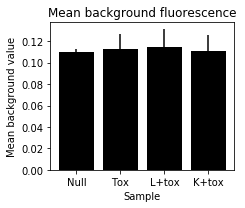

In [3]:
## histogram creation of background level
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3.50394, 3) #set a width of 89 mm

ax = plt.subplot(111)

## std and mean of each sample
#sample - Null
Null_all_mean = ((background_table['Null_1.1'].values.mean()+background_table['Null_1.2'].values.mean()+background_table['Null_1.3'].values.mean()+background_table['Null_2.1'].values.mean()+background_table['Null_2.2'].values.mean()+background_table['Null_2.3'].values.mean()+background_table['Null_3.1'].values.mean()+background_table['Null_3.2'].values.mean()+background_table['Null_3.3'].mean())/9)
Null_all_std = ((background_table['Null_1.1'].values.std()+background_table['Null_1.2'].values.std()+background_table['Null_1.3'].values.std()+background_table['Null_2.1'].values.std()+background_table['Null_2.2'].values.std()+background_table['Null_2.3'].values.std()+background_table['Null_3.1'].values.std()+background_table['Null_3.2'].values.std()+background_table['Null_3.3'].std())/9)
#sample - Tox
Tox_all_mean = ((background_table['Tox_1.1'].values.mean()+background_table['Tox_1.2'].values.mean()+background_table['Tox_1.3'].values.mean()+background_table['Tox_2.1'].values.mean()+background_table['Tox_2.2'].values.mean()+background_table['Tox_2.3'].values.mean()+background_table['Tox_3.1'].values.mean()+background_table['Tox_3.2'].values.mean()+background_table['Tox_3.3'].mean())/9)
Tox_all_std = ((background_table['Tox_1.1'].values.mean()+background_table['Tox_1.2'].values.std()+background_table['Tox_1.3'].values.std()+background_table['Tox_2.1'].values.std()+background_table['Tox_2.2'].values.std()+background_table['Tox_2.3'].values.std()+background_table['Tox_3.1'].values.std()+background_table['Tox_3.2'].values.std()+background_table['Tox_3.3'].std())/9)
#sample - L+tox
Ltox_all_mean = ((background_table['L+tox_1.1'].values.mean()+background_table['L+tox_1.2'].values.mean()+background_table['L+tox_1.3'].values.mean()+background_table['L+tox_2.1'].values.mean()+background_table['L+tox_2.2'].values.mean()+background_table['L+tox_2.3'].values.mean()+background_table['L+tox_3.1'].values.mean()+background_table['L+tox_3.2'].values.mean()+background_table['L+tox_3.3'].mean())/9)
Ltox_all_std = ((background_table['L+tox_1.1'].values.mean()+background_table['L+tox_1.2'].values.std()+background_table['L+tox_1.3'].values.std()+background_table['L+tox_2.1'].values.std()+background_table['L+tox_2.2'].values.std()+background_table['L+tox_2.3'].values.std()+background_table['L+tox_3.1'].values.std()+background_table['L+tox_3.2'].values.std()+background_table['L+tox_3.3'].std())/9)
#sample - K+tox
Ktox_all_mean = ((background_table['K+tox_1.1'].values.mean()+background_table['K+tox_1.2'].values.mean()+background_table['K+tox_1.3'].values.mean()+background_table['K+tox_2.1'].values.mean()+background_table['K+tox_2.2'].values.mean()+background_table['K+tox_2.3'].values.mean()+background_table['K+tox_3.1'].values.mean()+background_table['K+tox_3.2'].values.mean()+background_table['K+tox_3.3'].mean())/9)
Ktox_all_std = ((background_table['K+tox_1.1'].values.mean()+background_table['K+tox_1.2'].values.std()+background_table['K+tox_1.3'].values.std()+background_table['K+tox_2.1'].values.std()+background_table['K+tox_2.2'].values.std()+background_table['K+tox_2.3'].values.std()+background_table['K+tox_3.1'].values.std()+background_table['K+tox_3.2'].values.std()+background_table['K+tox_3.3'].std())/9)


# x and y axis of the plot 
x = ["Null", "Tox", "L+tox", "K+tox"]
y = [Null_all_mean, Tox_all_mean, Ltox_all_mean, Ktox_all_mean]
yb = [Null_all_std, Tox_all_std, Ltox_all_std, Ktox_all_std]
# Label the axis
plt.xlabel("Sample", fontsize=10)
plt.ylabel("Mean background value", fontsize=10)
plt.title("Mean background fluorescence", fontsize=12)

#plot
ax.bar(x, y, color='black', yerr=yb)

plt.tight_layout()
plt.savefig('result/background_plot',dpi=300)
plt.show()

The background level of the data sets are stable in time. Thus, we can remove the mean background level for each data sets to the CAT activity fluorescence level for each iteration.

#### b) CAT activity fluorescence

The quantification of the CAT activity was taken each 20 second for 10 minutes. The fluorescence level are stored in the file : `activity.csv`.

##### Calculation of TBN concentration over time

First, we want to remove the background noise, then convert the fluorescence level into TBN concentration ( [TBN] ), thank to Beer-Lambert equation.

In [4]:
## Raw fluorescence data table

raw_fluorescence = pd.read_csv("activity/activity.csv", names=["Time (s)","Null_1.1","Null_1.2","Null_1.3","Null_2.1","Null_2.2","Null_2.3","Null_3.1","Null_3.2","Null_3.3", "Tox_1.1", "Tox_1.2", "Tox_1.3", "Tox_2.1", "Tox_2.2", "Tox_2.3", "Tox_3.1", "Tox_3.2", "Tox_3.3", "L+tox_1.1", "L+tox_1.2", "L+tox_1.3", "L+tox_2.1", "L+tox_2.2", "L+tox_2.3", "L+tox_3.1", "L+tox_3.2", "L+tox_3.3", "K+tox_1.1","K+tox_1.2","K+tox_1.3", "K+tox_2.1","K+tox_2.2","K+tox_2.3", "K+tox_3.1","K+tox_3.2","K+tox_3.3"])
temp_raw_fluorescence = pd.concat([raw_fluorescence])  
 
raw_fluorescence_table = temp_raw_fluorescence[1:].astype('float64')

raw_fluorescence_table

,Time (s),Null_1.1,Null_1.2,Null_1.3,Null_2.1,Null_2.2,Null_2.3,Null_3.1,Null_3.2,Null_3.3,...,L+tox_3.3,K+tox_1.1,K+tox_1.2,K+tox_1.3,K+tox_2.1,K+tox_2.2,K+tox_2.3,K+tox_3.1,K+tox_3.2,K+tox_3.3
1,0.0,0.1354,0.1433,0.1395,0.1132,0.1144,0.1164,0.1138,0.1118,0.1147,...,0.1279,0.1342,0.1400,0.1413,0.1335,0.1285,0.1254,0.1131,0.1142,0.1154
2,27.5,0.1343,0.1430,0.1396,0.1117,0.1133,0.1145,0.1128,0.1111,0.1142,...,0.1364,0.1434,0.1486,0.1503,0.1372,0.1326,0.1300,0.1167,0.1172,0.1183
3,55.1,0.1339,0.1421,0.1383,0.1118,0.1122,0.1138,0.1125,0.1109,0.1142,...,0.1447,0.1532,0.1580,0.1604,0.1412,0.1378,0.1347,0.1187,0.1200,0.1207
4,82.6,0.1338,0.1418,0.1371,0.1117,0.1120,0.1139,0.1133,0.1116,0.1140,...,0.1532,0.1625,0.1660,0.1697,0.1461,0.1436,0.1397,0.1219,0.1236,0.1242
5,110.1,0.1334,0.1418,0.1374,0.1111,0.1116,0.1136,0.1129,0.1110,0.1142,...,0.1623,0.1724,0.1763,0.1802,0.1513,0.1475,0.1442,0.1262,0.1279,0.1282
6,137.6,0.1335,0.1413,0.1382,0.1122,0.1136,0.1148,0.1123,0.1109,0.1139,...,0.1699,0.1815,0.1852,0.1897,0.1553,0.1533,0.1496,0.1279,0.1302,0.1305
7,165.2,0.1334,0.1413,0.1376,0.1116,0.1124,0.1137,0.1121,0.1107,0.1139,...,0.1779,0.1905,0.1938,0.1996,0.1605,0.1581,0.1538,0.1315,0.1335,0.1340
8,192.7,0.1340,0.1411,0.1377,0.1119,0.1122,0.1137,0.1126,0.1111,0.1145,...,0.1863,0.1999,0.2031,0.2093,0.1647,0.1623,0.1584,0.1349,0.1371,0.1378
9,220.2,0.1336,0.1404,0.1376,0.1108,0.1116,0.1135,0.1121,0.1105,0.1137,...,0.1938,0.2087,0.2110,0.2180,0.1694,0.1669,0.1627,0.1373,0.1397,0.1401
10,247.8,0.1338,0.1408,0.1375,0.1114,0.1121,0.1140,0.1125,0.1108,0.1144,...,0.2017,0.2177,0.2200,0.2272,0.1742,0.1715,0.1677,0.1408,0.1433,0.1435


In [5]:
## TBN fluorescence level
fluorescence = raw_fluorescence_table.iloc[:, 1:] - background_table.iloc[:, 1:].mean()

## TBN concentration (uM)
c_tbn = (fluorescence/(13600*1.2))*1000000

Now that we have the concentration of TBN for each measurement time, we can plot the [TBN] in function of time.

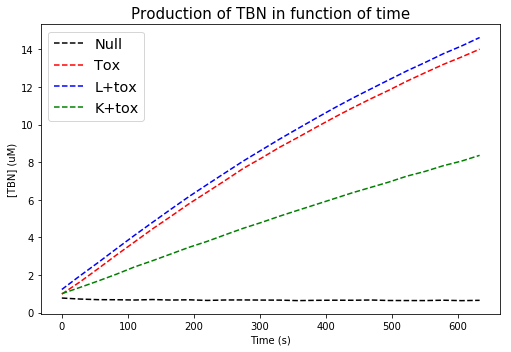

In [6]:
## Graph that will show the [TBN] in function of time

# mean of each sample
Null_TBN_mean = (c_tbn['Null_1.1'].values+c_tbn['Null_1.2'].values+c_tbn['Null_1.3'].values+c_tbn['Null_2.1'].values+c_tbn['Null_2.2'].values+c_tbn['Null_2.3'].values+c_tbn['Null_3.1'].values+c_tbn['Null_3.2'].values+c_tbn['Null_3.3'].values)/9
Tox_TBN_mean = (c_tbn['Tox_1.1'].values+c_tbn['Tox_1.2'].values+c_tbn['Tox_1.3'].values+c_tbn['Tox_2.1'].values+c_tbn['Tox_2.2'].values+c_tbn['Tox_2.3'].values+c_tbn['Tox_3.1'].values+c_tbn['Tox_3.2'].values+c_tbn['Tox_3.3'].values)/9
Ltox_TBN_mean = (c_tbn['L+tox_1.1'].values+c_tbn['L+tox_1.2'].values+c_tbn['L+tox_1.3'].values+c_tbn['L+tox_2.1'].values+c_tbn['L+tox_2.2'].values+c_tbn['L+tox_2.3'].values+c_tbn['L+tox_3.1'].values+c_tbn['L+tox_3.2'].values+c_tbn['L+tox_3.3'].values)/9
Ktox_TBN_mean = (c_tbn['K+tox_1.1'].values+c_tbn['K+tox_1.2'].values+c_tbn['K+tox_1.3'].values+c_tbn['K+tox_2.1'].values+c_tbn['K+tox_2.2'].values+c_tbn['K+tox_2.3'].values+c_tbn['K+tox_3.1'].values+c_tbn['K+tox_3.2'].values+c_tbn['K+tox_3.3'].values)/9

# value of x and y
x = raw_fluorescence_table["Time (s)"][:24]

#Graph
fig, ax = plt.subplots()
fig.set_size_inches(7.2, 5) #set a width of 183 mm

ax.plot(x, Null_TBN_mean, 'k--', label='Null')
ax.plot(x, Tox_TBN_mean, 'r--', label='Tox')
ax.plot(x, Ltox_TBN_mean, 'b--', label='L+tox')
ax.plot(x, Ktox_TBN_mean, 'g--', label='K+tox')

# Labels and legend
plt.xlabel("Time (s)")
plt.ylabel("[TBN] (uM)")
plt.title("Production of TBN in function of time", fontsize=15)
legend = plt.legend(loc='upper left', fontsize='x-large')

plt.tight_layout()
plt.savefig('result/TBN_production_plot',dpi=300)
plt.show()

##### CAT activity for each cell variant

Now that we have the [TBN] over time, we can calculate the CAT activity for each data sets. The CAT activity correspond to the [TBN] ($\mu$M) produced per min, it can be calculated thanks to slope value of the previous graph.

In [7]:
## Calculation of the CAT activity for each sample (uM/min)
activity = (fluorescence[17:18].values-fluorescence[1:2].values)/(raw_fluorescence_table["Time (s)"][17:18].values-raw_fluorescence_table["Time (s)"][1:2].values)*60

## Table creation that have all the CAT activity calculation for each sample (biological and technical replicat)

# Data set per sample
Null = [activity[0,0], activity[0,1], activity[0,2], activity[0,3], activity[0,4], activity[0,5], activity[0,6], activity[0,7], activity[0,8]]
Tox = [activity[0,9], activity[0,10], activity[0,11], activity[0,12], activity[0,13], activity[0,14], activity[0,15], activity[0,16], activity[0,17]]
L_tox = [activity[0,18], activity[0,19], activity[0,20], activity[0,21], activity[0,22], activity[0,23], activity[0,24], activity[0,25], activity[0,26]]
K_tox = [activity[0,27], activity[0,28], activity[0,29], activity[0,30], activity[0,31], activity[0,32], activity[0,33], activity[0,34], activity[0,35]]

# Table creation
d = {'Null': Null, 'Tox': Tox, 'L_tox': L_tox, 'K_tox': K_tox}
table_activity = pd.DataFrame(data=d)
table_activity.to_csv('result/enzymatic_activity.csv') # save the plot
table_activity

,Null,Tox,L_tox,K_tox
0,-0.000095,0.021467,0.024245,0.018919
1,-0.000286,0.022529,0.022665,0.018538
2,0.000177,0.022733,0.024804,0.018974
3,-0.000150,0.019137,0.025703,0.009930
4,-0.000177,0.019274,0.024736,0.010120
5,-0.000123,0.018620,0.024844,0.009930
6,-0.000177,0.024027,0.017476,0.006415
7,-0.000054,0.023564,0.017625,0.006879
8,-0.000123,0.023346,0.016577,0.006661


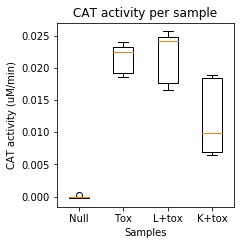

In [8]:
## Boxplot of CAT activity per sample
fig, ax = plt.subplots()
fig.set_size_inches(3.50394, 3.50394) #set a width of 89 mm

#data set and sample
data = (table_activity["Null"], table_activity["Tox"], table_activity["L_tox"], table_activity["K_tox"])

plt.boxplot(data)

#legend
plt.xlabel("Samples")
plt.ylabel("CAT activity (uM/min)")
plt.title("CAT activity per sample")
plt.xticks([1, 2, 3, 4], ['Null', 'Tox', 'L+tox', 'K+tox'])

plt.tight_layout()
plt.savefig('result/activity_boxplot',dpi=300)
plt.show()

We can observe that the CAT activity value of the different samples. The negative control has no CAT activity and the positive control show a CAT activity of 0.022 $\mu M.min^{-1}$. In presence of the peptide L, we observe a CAT activity as the same level as the positive control. However, with peptide K, the CAT activity drop with a median of 0.010 $\mu M.min^{-1}$.

Before drawing any conclusion, we need to verify that the CAT activity variation of our samples are "significant", thanks to an analysis of variance (ANOVA).

### 2- Normal distribution and variance homogeneity verification

Now that we have obtained the CAT activity value ($\mu$M/min) we can analyze variance variability between the samples, thank to an ANOVA test. However, this statistical test has important assumptions that must be satisfied in order for the associated p-value to be valid.

1. The samples are independent.
2. The data set need to follow a normal distribution.
3. The population should have a variance homogeneity.

As, our samples are independant, we just need to verify the normal distribution and the homogeneity of variance between sample's activity value. These verifications will be conducted thanks to a probability plot and a Bartlett's test.

#### a) Normal distribution - Probability plot

The probability plot is a graphical technique for assessing if our sample's activity value follows a normal distribution. The data are plotted against a theoretical distribution and the points should form approximately a straight line. The offset from this line indicate departures from normality. The capacity to form this straight line is calculate thank to $R^2$, which has a value between 0 and 1.

$R^2$ is a statistical measure of how close the data are to the fitted regression line. 

$$
R^2 = \frac{variation}{Total~variation}
$$

In general, the closer to 1 is $R^2$ the better the model fits the data.

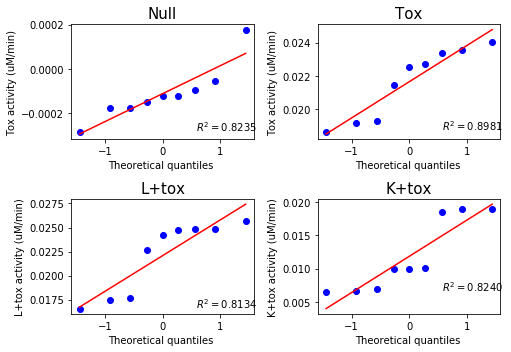

In [9]:
##Probability for each sample data set

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7.2, 5) #set a width of 183 mm

#Sample Null
ax1 = plt.subplot(221)
res = stats.probplot(Null, plot=plt, rvalue=True)
ax1.set_title("Null", fontsize=15)
ax1.set_xlabel('Theoretical quantiles ', fontsize=10)
ax1.set_ylabel('Tox activity (uM/min)', fontsize=10)

#Sample Tox
ax2 = plt.subplot(222)
res = stats.probplot(Tox, plot=plt, fit=True, rvalue=True)
ax2.set_title("Tox", fontsize=15)
ax2.set_xlabel('Theoretical quantiles ', fontsize=10)
ax2.set_ylabel('Tox activity (uM/min)', fontsize=10)

#Sample L+tox
ax3 = plt.subplot(223)
res = stats.probplot(L_tox, plot=plt, fit=True, rvalue=True)
ax3.set_title("L+tox", fontsize=15)
ax3.set_xlabel('Theoretical quantiles ', fontsize=10)
ax3.set_ylabel('L+tox activity (uM/min)', fontsize=10)

#Sample K+tox
ax4 = plt.subplot(224)
res = stats.probplot(K_tox, plot=plt, fit=True, rvalue=True)
ax4.set_title("K+tox", fontsize=15)
ax4.set_xlabel('Theoretical quantiles ', fontsize=10)
ax4.set_ylabel('K+tox activity (uM/min)', fontsize=10)

fig.subplots_adjust(wspace=0.5, hspace=0.8, left=0., right=0.9, top=0.9, bottom=0.1)

plt.tight_layout()
plt.savefig('result/probability_plot',dpi=300)
plt.show()

In [10]:
## Bartlett's test 
print(stats.bartlett(Null, Tox, L_tox, K_tox))

BartlettResult(statistic=49.95575331782528, pvalue=8.164417996598575e-11)


We find a p-value smaller than $\alpha$, we reject the null hypothesis. The variances are not homogeneous between our sample.

Rejecting this null hypothesis doesn't cause a huge problem because an alternative to the classic ANOVA test exist. Like the ANOVA test, the Welch's ANOVA compares two means to see if they are equal. It is an alternative that can be used if our data doesn't have a homogeneity of variances.

### 2-  Welch's ANOVA test

The hypotheses of interest in an ANOVA are as follows:
$$
H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4 \\
H_1: \mu_i \neq \mu_j
$$

The statistical test is defined as :

$$
F = \frac{\frac{1}{k-1}\times \sum_{j=1}^k w_j.(\bar{x}_j-\bar{x}')^2}{1 + \frac{2(k-2)}{k^2-1} \sum_{j=1}^k \frac{1}{n_j - 1} (1-\frac{w_j}{w})^2)}
$$

That can be calculated thanks to :

$$
w_j = \frac{n_j}{s_j^2} \\
w = \sum_{j=1}^k w_J \\
\bar{x}' = \frac{\sum_{j=1}^k w_j\bar{x}_j}{w}
$$

With $k$ being the different population, $n$ the number of data per population, $\bar{x}_j$ is the mean of the data for the sample j and $s_j^2$ is the sample variance.

In [11]:
## Basic data:
# number of sample
k = 4

# number of data in each dataset
n = 9

# mean value of each dataset
mean_null = table_activity['Null'].values.mean()
mean_tox = table_activity['Tox'].values.mean()
mean_Ltox = table_activity['L_tox'].values.mean()
mean_Ktox = table_activity['K_tox'].values.mean()

# variance of each sample
var_null = (table_activity['Null'].values.std())**2
var_tox = (table_activity['Tox'].values.std())**2
var_Ltox = (table_activity['L_tox'].values.std())**2
var_Ktox = (table_activity['K_tox'].values.std())**2

## value caculated
# wj-value
w_null = n/var_null
w_tox = n/var_tox
w_Ltox = n/var_Ltox
w_Ktox = n/var_Ktox

# w value
w = w_null + w_tox + w_Ltox + w_Ktox

# x'value
x_bis = ((w_null*mean_null) + (w_tox*mean_tox) + (w_Ltox*mean_Ltox) + (w_Ltox*mean_Ltox))/w

## cacul of the F value
# numerateur
a = ((w_null*(mean_null-x_bis)**2) + (w_tox*(mean_tox-x_bis)**2) + (w_Ltox*(mean_Ltox-x_bis)**2) + (w_Ktox*(mean_Ktox-x_bis)**2))/(k-1)

# denominateur
b = ((1-w_null/w)**2)/(n-1) + ((1-w_tox/w)**2)/(n-1) + ((1-w_Ltox/w)**2)/(n-1) + ((1-w_Ktox/w)**2)/(n-1)

# F-value
F = a/(1+2*b*(k-2)/(k**2-1))

print("F value :", F)

F value : 449.56263611947793


Now that we have our probability F, we need to calculate the p-value. We will use the Snedecor's F distribution (degree of diversity) and the degrees of freedom $dfn$ and $df$.

$$
df = \frac{dfn}{dfd} = \frac{k^2 - 1}{3 \sum_{j=1}^k (\frac{1}{n_j - 1}) (1-\frac{w_j}{w})^2}
$$

In [12]:
##degree of freedom and alpha value
dfn = (k**2 - 1)
df = dfn/(3*b)

##calcul of p-value
pvalue = stats.f.pdf(F, dfn, df)
print("p-value: ", pvalue)

p-value:  2.424995326903697e-17


We obtain a p-value inferior to $\alpha$. Thus, we can conclude that there is a significant difference between the means of the four sample. Now we need to run several post-hoc tests and pairwise multiple comparisons. This will help us determine which pair of samples has means that differ from each other.

Our post-hoc will be Dunnett's test, which is a multiple comparison (many-to-one comparisons) tests that do not assume equal variances. This test will compare each of a number of treatments with a single control. Multiple testing problem occurs when one considers a set of statistical inferences simultaneously, which often lead to type I errors. However, Dunnett's test has a control which prevent these problems.

### 3-  Test post-hoc : Dunnett's test

Dunnett’s test is used to compare two groups, similarly to a t-test. The formula gives a value (D) that we use to compare mean differences. If the distance between the mean of two samples is greater than the D value obtain, then that distance is significant.

$$
D = t_{Dunnett}.\sqrt{\frac{2.\sum_{j=1}^k (n-k).s_j^2}{n}} 
$$

$t_{Dunnett}$ is the critical value of the Dunnett's test (you can find it [here](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2017/01/dunnett-critical-value.pdf)). We choose to use $\alpha$ = 0.05. Thus, t is equal to 2.81.

We have k which correspond to the number of samples, n correspond to the number of data in each dataset and $s_j^2$ is the sample variance.

In [13]:
# D-value calcul
D = 2.81*((2*((n-k)*var_null+(n-k)*var_tox+(n-k)*var_Ltox+(n-k)*var_Ktox)/(n))**(0.5))
print(D)

0.019348491946053505


In [14]:
# comparison between pairs of mean and the D-value

Dmean_null_tox = mean_tox - mean_null
if Dmean_null_tox > D:
    print("The samples Null and Tox form a significant pairs")

Dmean_null_Ltox = mean_Ltox - mean_null
if Dmean_null_Ltox > D:
    print("The samples Null and L+tox form a significant pairs")

Dmean_null_Ktox = mean_Ktox - mean_null
if Dmean_null_Ktox > D:
    print("The samples Null and K+tox form a significant pairs")

Dmean_tox_Ltox =  mean_Ltox - mean_tox
if Dmean_tox_Ltox > D:
    print("The samples Tox and L+tox form a significant pairs")

Dmean_tox_Ktox = mean_tox - mean_Ktox
if Dmean_tox_Ktox > D:
    print("The samples Tox and K+tox form a significant pairs")

Dmean_Ltox_Ktox = mean_Ltox - mean_Ktox
if Dmean_Ltox_Ktox > D:
    print("The samples Ltox and K+tox form a significant pairs")


The samples Null and Tox form a significant pairs
The samples Null and L+tox form a significant pairs


## Conclusion

There is a statistical difference only between the negative control (Null) and the positive control (Tox) and between the negative control (Null) and the sample containing the peptide L (L+tox). We can then assume that the peptide L doesn't seem to affect the dimerisation of TssL transmembrane helix.

However, for the peptide K it is more difficult to draw conclusion because the CAT activity in presence of this peptide is not statistically different from the one of both of the controls. Further investigation of the interfering power this peptide need to be carry out in order to draw a conclusion.